## Load modules

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 112 GB / percent used: 10.8 %


## Load model data

In [2]:
# Define period
period = slice('1981','2014')

- CNRM-CM6-1  
- CNRM-CM6-1-HR  
- CNRM-ESM2-1


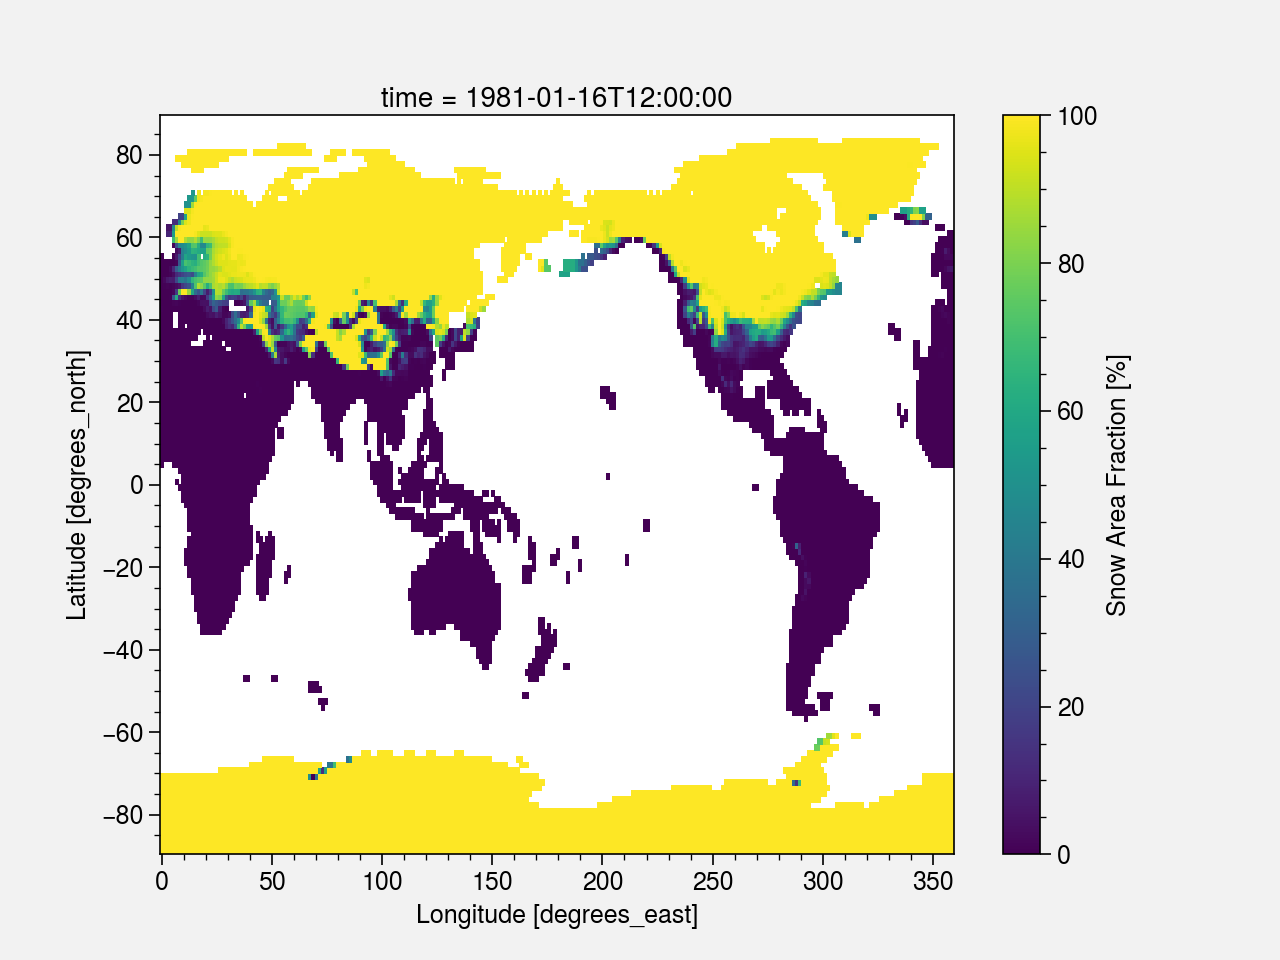

In [3]:
snc_historical = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/LImon/snc/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

snc_historical[0].plot()

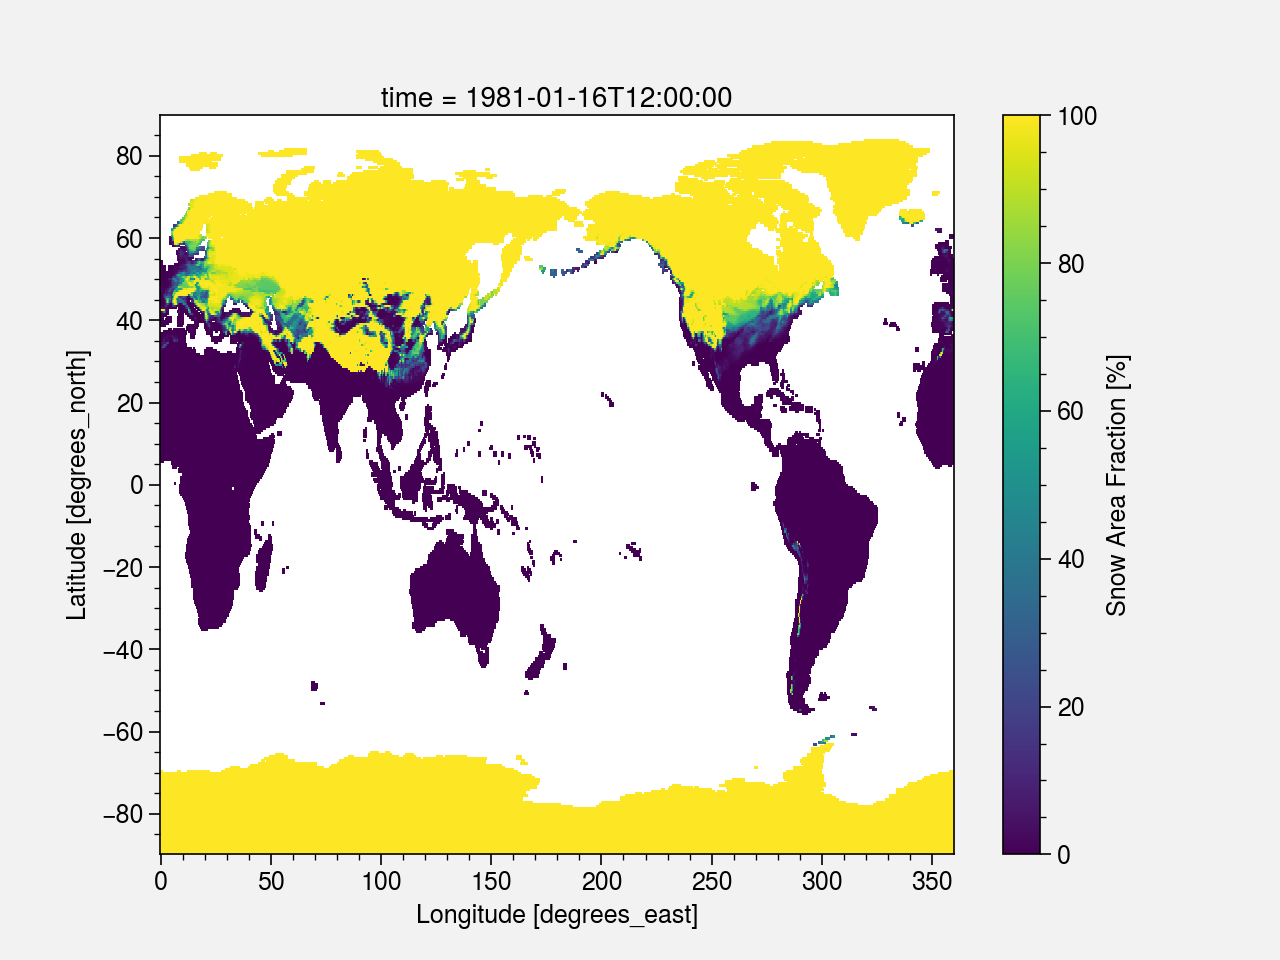

In [4]:
snc_historical = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1-HR/historical/r1i1p1f2/LImon/snc/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

snc_historical[0].plot()

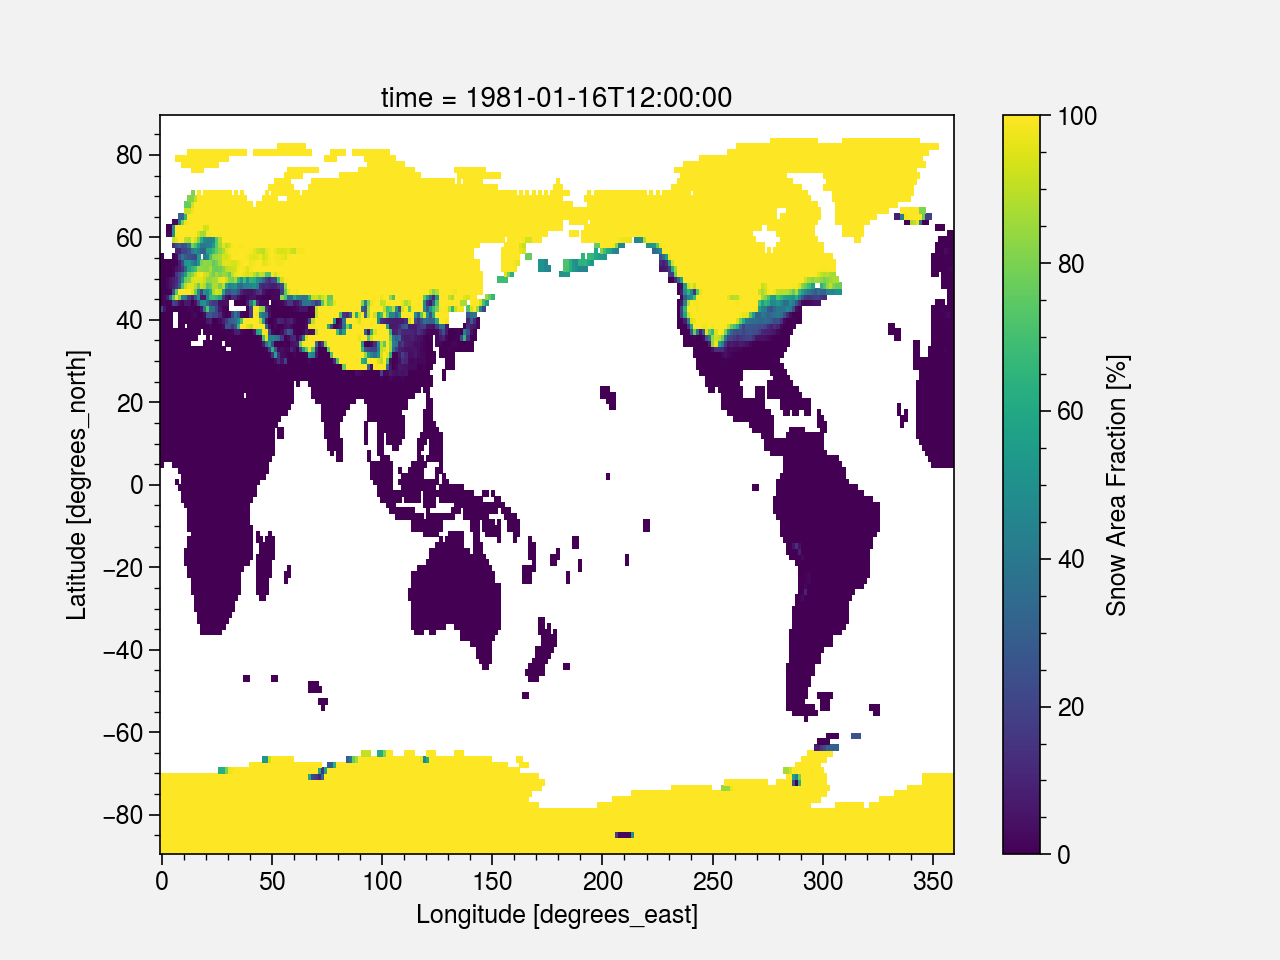

In [5]:
snc_historical = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/LImon/snc/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

snc_historical[0].plot()

${root}/CMIP6/${mip}/${institute}/${model}/${experiment}/${realization}/${table}/${variable}/${grid}/${version}/${variable}_${table}_${model}_${experiment}_${realization}_${grid}_${PERIOD}.nc

In [6]:
institute = 'CNRM-CERFACS'
model = 'CNRM-CM6-1'
realization = 'r1i1p1f2'
table = 'LImon'
var = 'snc'
# model = 'CNRM-CM6-1-HR'
# modle = 'CNRM-ESM2-1'

# Load historical
snc_historical = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

# Load amip
snc_amip = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/amip/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

# Load land-hist
# snc_land_hist = xr.open_mfdataset(
#     '/bdd/CMIP6/LS3MIP/'+institute+'/'+model+'/land-hist/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
# ).sel(time=period).snc

# Load HighResMIP
snc_HR = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'-HR/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

## Load Rutger University data set

In [7]:
ds_rutger = xr.open_dataset('/data/mlalande/RUTGERS/nhsce_v01r01_19661004_20191202.nc').sel(time=period)

### Get the snc variable, keep only land data, convert to % and resample by months
Resampling with xarray: http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html  
**Offset aliases**: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases  
Here we use: **MS**	month start frequency

In [8]:
# Get the snc variable, keep only land data and convert to %
with xr.set_options(keep_attrs=True):
    snc_rutger = ds_rutger.snow_cover_extent.where(ds_rutger.land == 1)*100
    
snc_rutger.attrs['units'] = '%'

# Rename lon and lat for the regrid
snc_rutger = snc_rutger.rename({'longitude': 'lon', 'latitude': 'lat'})

# Resamble data per month (from per week)
snc_rutger = snc_rutger.resample(time='1MS').mean('time', skipna='False', keep_attrs=True)
snc_rutger

/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'snow_cover_extent' (time: 408, rows: 88, cols: 88)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time                  (time) datetime64[ns] 1981-01-01 ... 2014-12-01
    snow_cover_threshold  float32 0.42
    lat                   (rows, cols) float64 0.6592 1.322 ... 1.322 0.6592
    lon                   (rows, cols) float64 145.0 144.3 ... -35.67 -35.0
Dimensions without coordinates: rows, cols
Attributes:
    long_name:      NOAA/NCDC Climate Data Record of snow cover extent
    standard_name:  surface_snow_binary_mask
    grid_mapping:   coord_system
    valid_range:    [0 1]
    flag_values:    [0 1]
    flag_meanings:  no_snow snow_covered
    units:          %

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/)
Value of cells in the new grid that are outside the old grid's domain #15 (https://github.com/JiaweiZhuang/xESMF/issues/15)

In [9]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder = xe.Regridder(snc_rutger, snc_historical, 'bilinear', periodic=False)
regridder = add_matrix_NaNs(regridder)
print(regridder)

# Regrid the data
snc_rutger_regrid = regridder(snc_rutger)

Overwrite existing file: bilinear_88x88_128x256.nc 
 You can set reuse_weights=True to save computing time.


/home/mlalande/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_88x88_128x256.nc 
Reuse pre-computed weights? False 
Input grid shape:           (88, 88) 
Output grid shape:          (128, 256) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


Text(0.5, 1.0, 'IPSL_CM6A_LR grid 128x256')

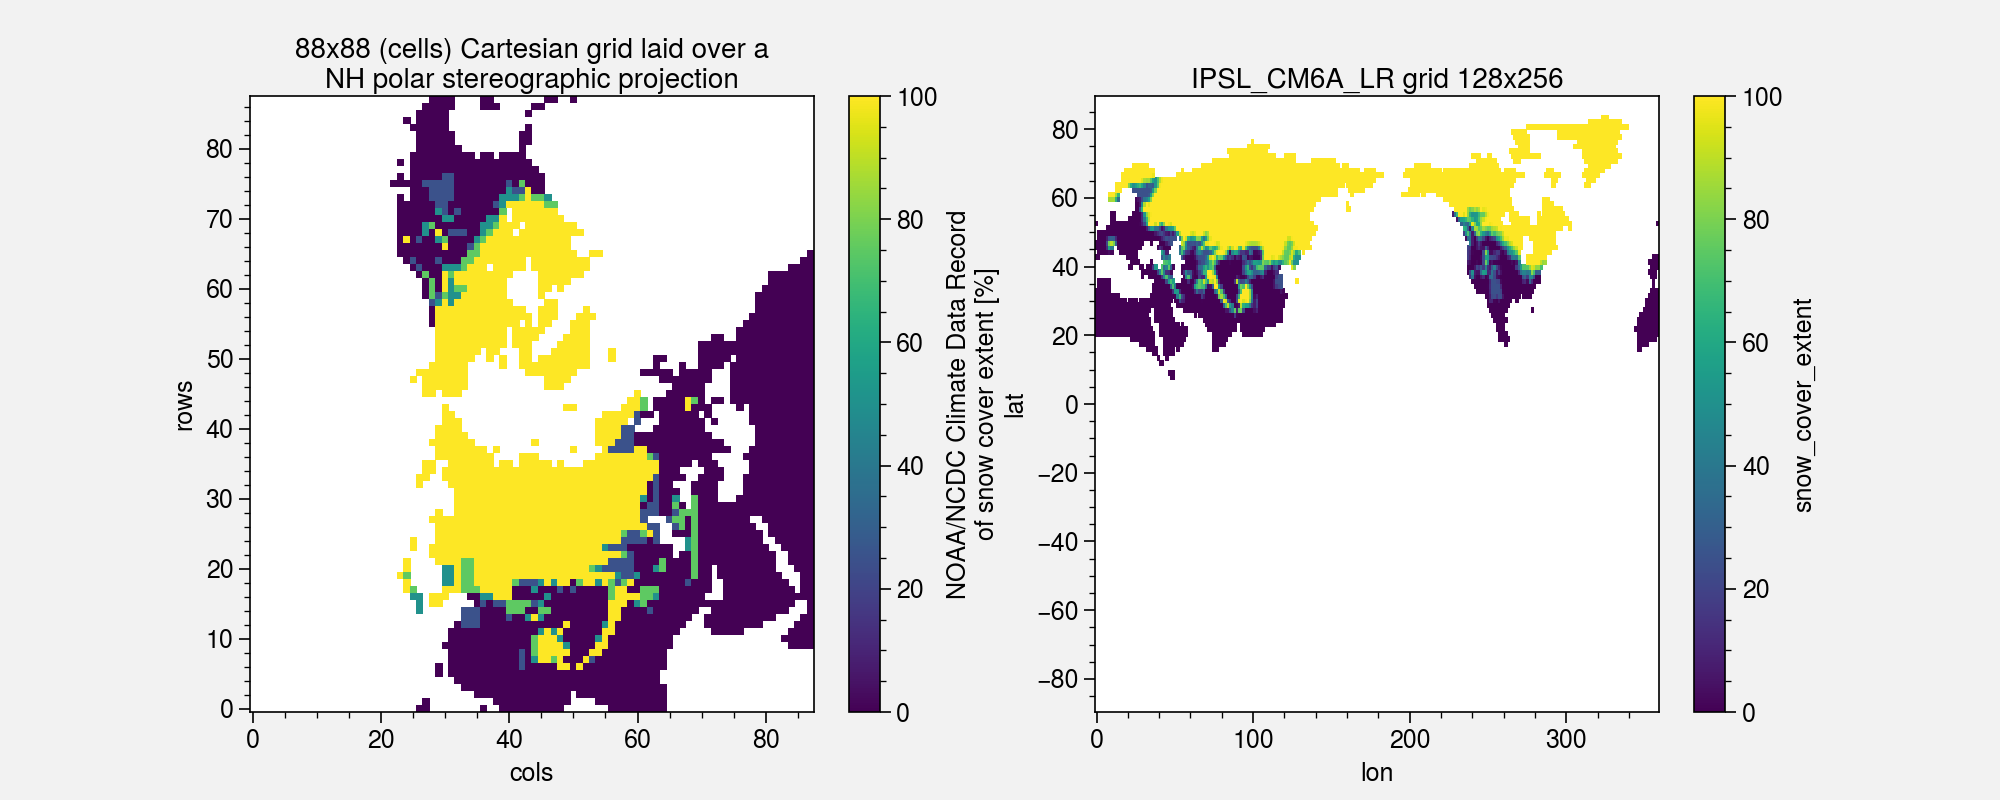

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(121)
snc_rutger[0].plot()
plt.title('88x88 (cells) Cartesian grid laid over a\nNH polar stereographic projection')
plt.subplot(122)
snc_rutger_regrid[0].plot()
plt.title('IPSL_CM6A_LR grid 128x256')

In [11]:
# Regrid HighResMIP
regridder = xe.Regridder(snc_HR, snc_historical, 'bilinear', periodic=True)
regridder

Overwrite existing file: bilinear_360x720_128x256_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_360x720_128x256_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (360, 720) 
Output grid shape:          (128, 256) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [12]:
# Regrid the data
snc_HR_regrid = regridder(snc_HR)

## Climatology

In [13]:
snc_historical_clim = u.clim(snc_historical)
snc_historical_clim.load()

snc_amip_clim = u.clim(snc_amip)
snc_amip_clim.load()

# snc_land_hist_clim = u.clim(snc_land_hist)
# snc_land_hist_clim.load()

snc_rutger_regrid_clim = u.clim(snc_rutger_regrid)
snc_rutger_regrid_clim.load()

snc_HR_regrid_clim = u.clim(snc_HR_regrid)
snc_HR_regrid_clim.load()

<xarray.DataArray (lat: 128, lon: 256)>
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Attributes:
    regrid_method:  bilinear

In [20]:
latlim=(10,50)
lonlim=(60,110)

bias = xr.concat(
    [
        snc_historical_clim-snc_rutger_regrid_clim,
        snc_amip_clim-snc_rutger_regrid_clim,
#         snc_land_hist_clim-snc_rutger_regrid_clim,
        snc_HR_regrid_clim-snc_rutger_regrid_clim
    ],
    pd.Index(
        [
            'Historical (128x256) - NOAA CDR (88x88 NH)',
            'AMIP (128x256) - NOAA CDR (88x88 NH)',
#             'land-hist (143x144) - NOAA CDR (88x88 NH)',
            'HR (360x720) - NOAA CDR (88x88 NH)'
        ], 
        name='bias'
    )
).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))

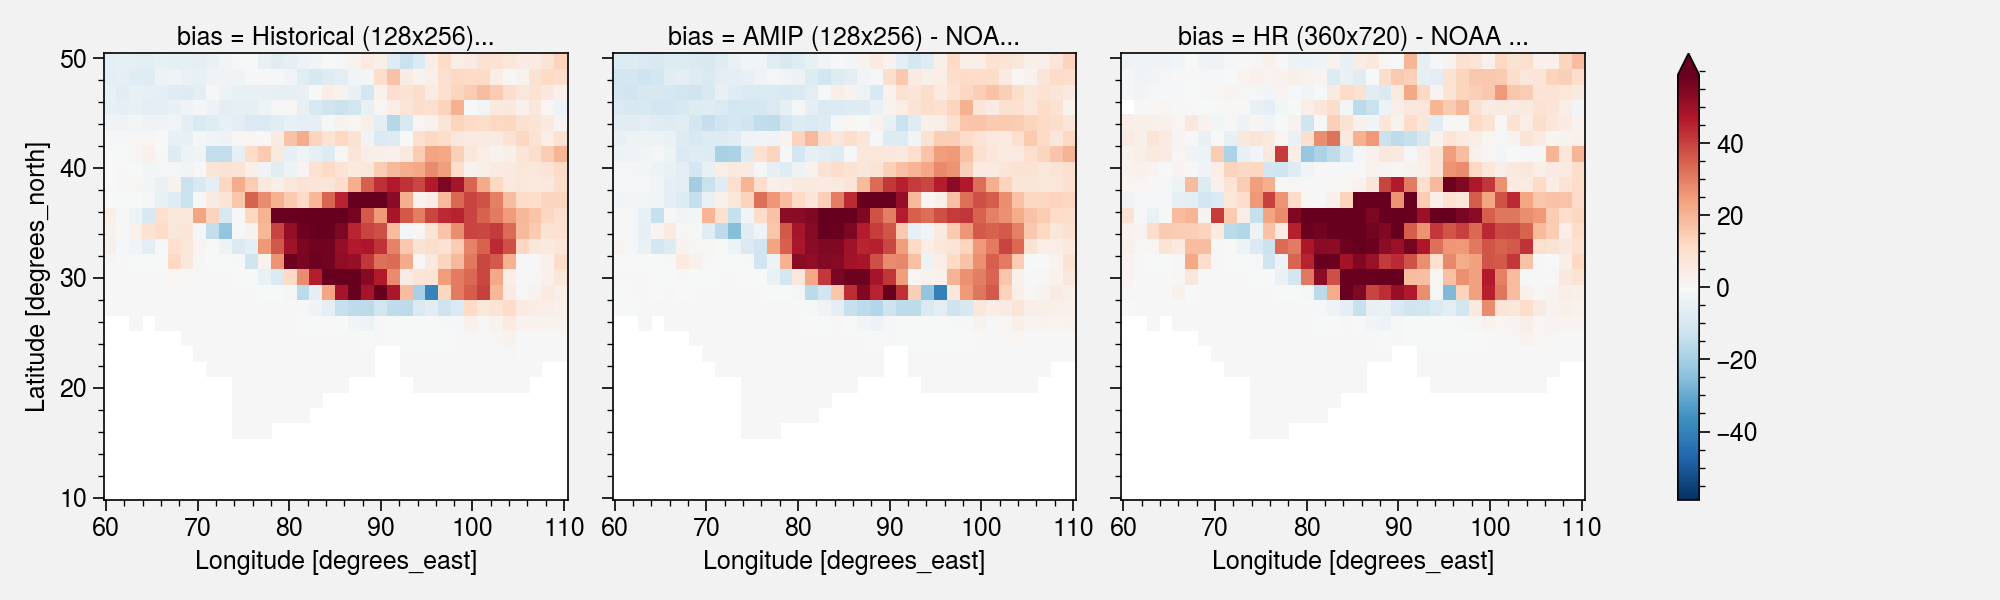

In [21]:
bias.plot(col='bias', robust=True)

In [16]:
bias.max()

<xarray.DataArray ()>
array(80.18550362)
Coordinates:
    snow_cover_threshold  float32 0.42

In [17]:
bias.min()

<xarray.DataArray ()>
array(-40.39161435)
Coordinates:
    snow_cover_threshold  float32 0.42

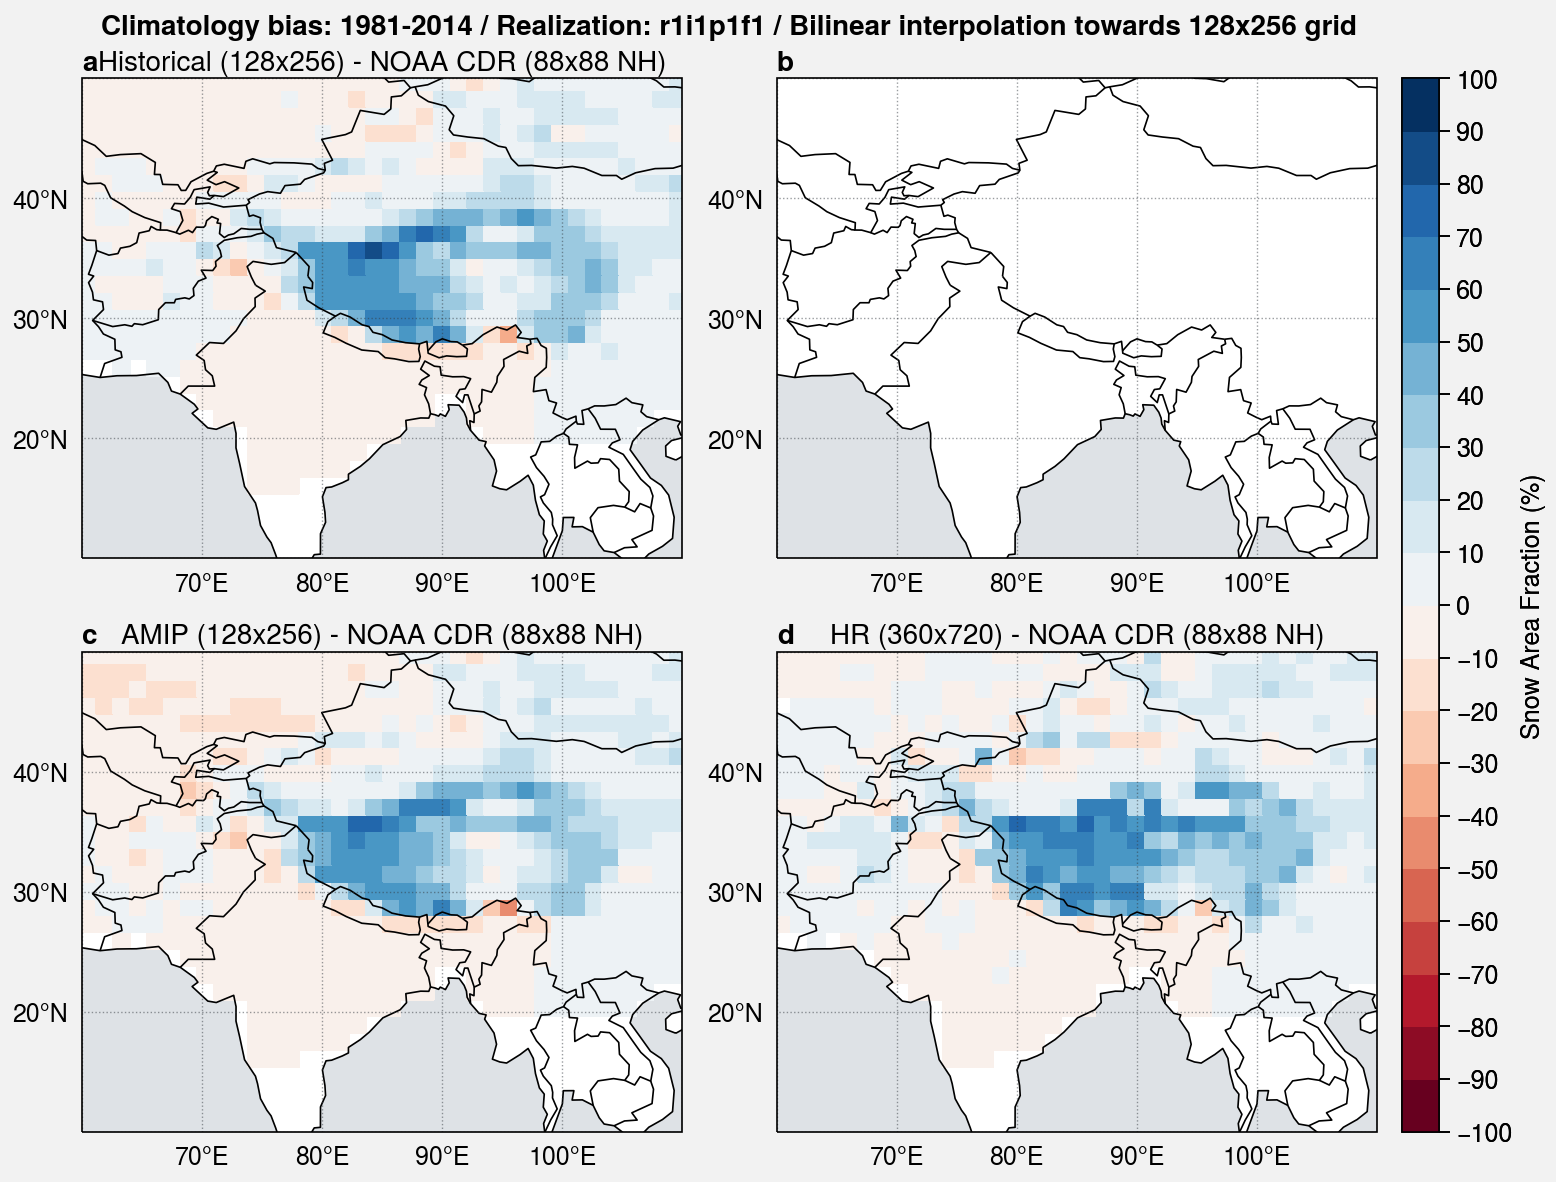

In [23]:
# Final plot

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2, share=3, axwidth=3)

for i, ax in enumerate(axs):
    if i!=1:
        if i>1:
            i-=1
        m = ax.pcolormesh(
            bias.isel(bias=i), 
            cmap='RdBu', 
            levels=plot.arange(-100,100,10), 
        #     extend='both',
    #         norm='midpoint'
        )
        ax.format(title=str(bias.isel(bias=i).bias.values))

f.colorbar(m, label='Snow Area Fraction (%)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Climatology bias: 1981-2014 / Realization: r1i1p1f1 / Bilinear interpolation towards 128x256 grid",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

f.save('img/snow_cover_CNRM_CMIP6_bias.pdf')

# Annual cycle on the bias zone

In [24]:
lonlim_zone=(78,78+20)
latlim_zone=(27,27+11)

In [25]:
test = snc_historical.sel(
        lon=slice(lonlim_zone[0],lonlim_zone[1]), 
        lat=slice(latlim_zone[0],latlim_zone[1])
    )

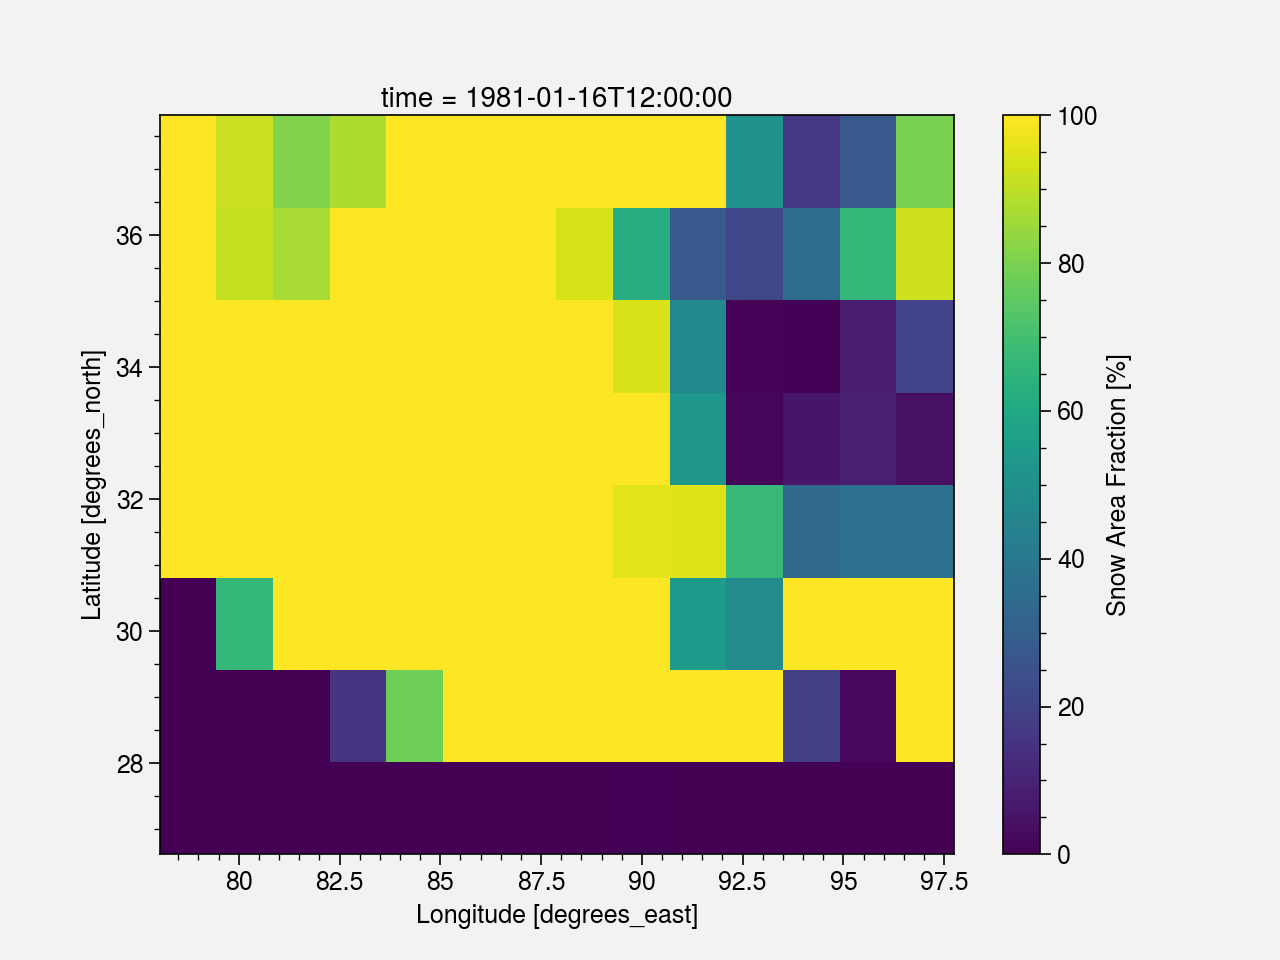

In [26]:
test[0].plot()

In [27]:
(u.spatial_average(
    snc_historical[0].sel(
        lon=slice(lonlim_zone[0],lonlim_zone[1]), 
        lat=slice(latlim_zone[0],latlim_zone[1])
    )
)).values

array(64.62984722)

In [28]:
# Compute annual cycles on the zone
ac_historical = u.annual_cycle(u.spatial_average(
    snc_historical.sel(lon=slice(lonlim_zone[0],lonlim_zone[1]), lat=slice(latlim_zone[0],latlim_zone[1]))
)).load()
ac_amip = u.annual_cycle(u.spatial_average(
    snc_amip.sel(lon=slice(lonlim_zone[0],lonlim_zone[1]), lat=slice(latlim_zone[0],latlim_zone[1]))
)).load()
# ac_land_hist = u.annual_cycle(u.spatial_average(
#     snc_land_hist.sel(lon=slice(lonlim_zone[0],lonlim_zone[1]), lat=slice(latlim_zone[0],latlim_zone[1]))
# )).load()
ac_rutger_regrid = u.annual_cycle(u.spatial_average(
    snc_rutger_regrid.sel(lon=slice(lonlim_zone[0],lonlim_zone[1]), lat=slice(latlim_zone[0],latlim_zone[1]))
)).load()
ac_HR_regrid = u.annual_cycle(u.spatial_average(
    snc_HR_regrid.sel(lon=slice(lonlim_zone[0],lonlim_zone[1]), lat=slice(latlim_zone[0],latlim_zone[1]))
)).load()

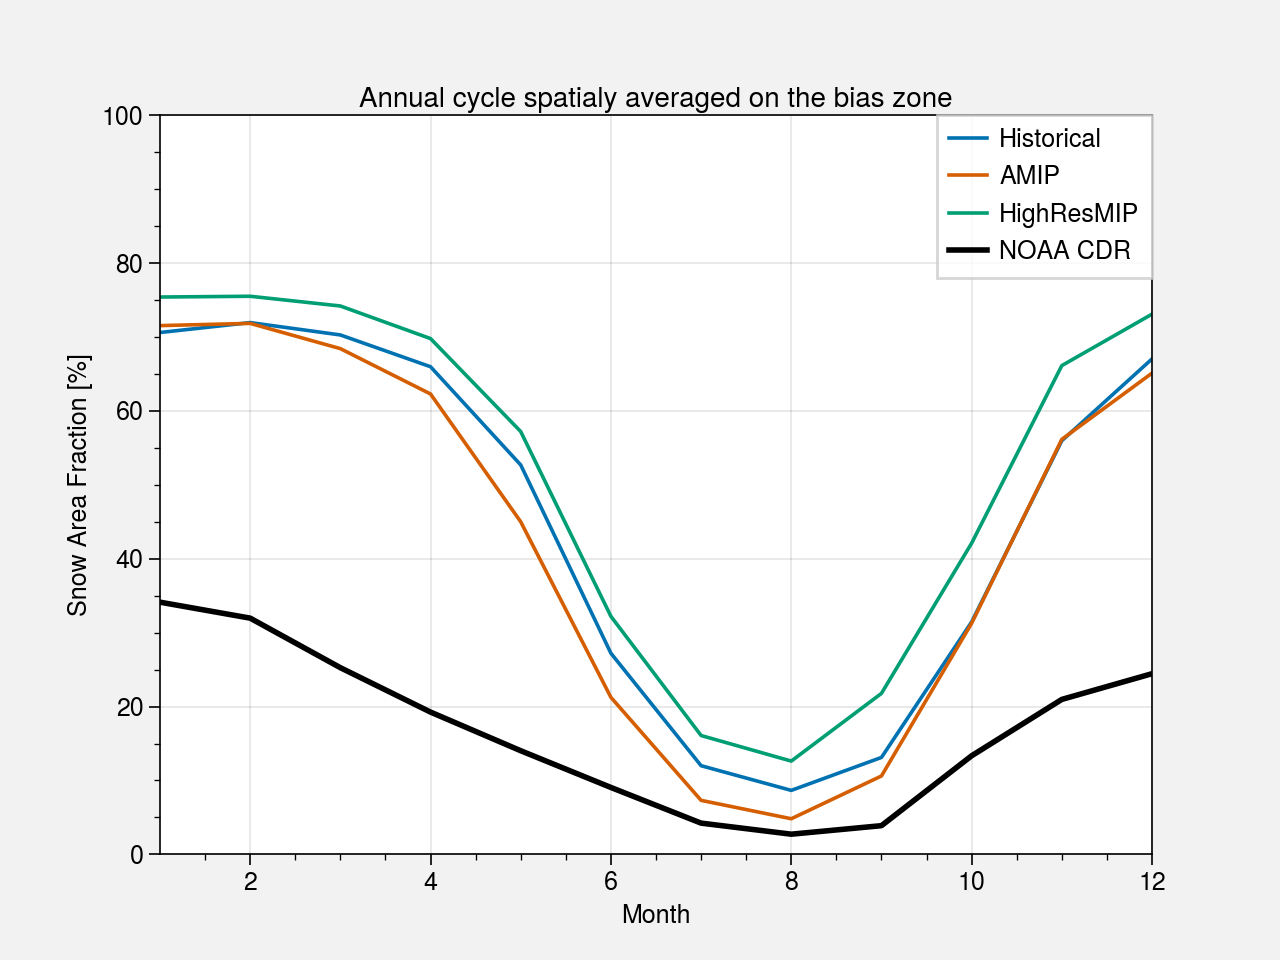

In [30]:
plt.figure()

ac_historical.plot(label='Historical')
ac_amip.plot(label='AMIP')
# ac_land_hist.plot(label='land-hist')
ac_HR_regrid.plot(label='HighResMIP')

ac_rutger_regrid.plot(label='NOAA CDR', color='black', linewidth=2)

plt.title('Annual cycle spatialy averaged on the bias zone')
plt.ylim(0,100)
plt.ylabel('Snow Area Fraction [%]')
plt.xlabel('Month')
plt.legend()

plt.savefig('img/ac_snow_cover_CNRM_CMIP6.pdf')

# Check ensemble dispersion for historical

In [28]:
snc_historical_ens = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/*/LImon/snc/gr/latest/*.nc', combine='nested', concat_dim='realization', parallel=True
).sel(time=period, lon=slice(lonlim_zone[0],lonlim_zone[1]), lat=slice(latlim_zone[0],latlim_zone[1])).snc
snc_historical_ens

<xarray.DataArray 'snc' (realization: 24, time: 408, lat: 8, lon: 14)>
dask.array<getitem, shape=(24, 408, 8, 14), dtype=float32, chunksize=(1, 408, 8, 14), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 27.31 28.72 30.12 31.52 32.92 34.32 35.72 37.12
  * lon      (lon) float64 78.75 80.16 81.56 82.97 ... 92.81 94.22 95.62 97.03
Dimensions without coordinates: realization
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    comment:             ISBA snow cover over bare ground comparable with sta...
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [29]:
ac_historical_ens = u.annual_cycle(u.spatial_average(snc_historical_ens)).load()
ac_historical_ens

<xarray.DataArray (realization: 24, month: 12)>
array([[70.66443586, 71.64548468, 69.96527707, 65.91996815, 52.26443632,
        27.02897127, 11.78575792,  8.68538907, 12.08149435, 29.95500771,
        55.59273965, 66.75366154],
       [71.36130053, 71.49072276, 70.48890165, 65.95004974, 51.92351338,
        26.95619509, 11.63776117,  8.4762086 , 13.73051592, 31.39249305,
        56.37141266, 66.99630437],
       [71.3141124 , 71.78122554, 70.11375193, 66.01782358, 51.76003818,
        27.12411774, 11.55040001,  8.61461092, 13.79873494, 32.40236923,
        56.7081007 , 66.99345362],
       [69.30894932, 70.04462383, 68.81813379, 63.27831147, 51.80724991,
        27.62123848, 11.83192442,  8.28287259, 12.72271182, 30.57581744,
        51.46613001, 64.34523533],
       [70.22578472, 70.89231965, 69.41707676, 65.43272046, 50.91998719,
        26.38216815, 11.8814169 ,  8.33627952, 12.6958974 , 32.41130489,
        54.7180931 , 65.51081451],
       [69.73098556, 71.62173365, 69.8291166 , 64.12294257, 50.01954293,
        25.07356017, 11.27983953,  8.48320882, 13.19095045, 32.36016177,
        55.11488156, 65.48076339],
       [71.0809529 , 71.69343198, 70.26527686, 65.63585492, 50.39622749,
        25.98056721, 11.33195615,  7.80429808, 13.30813639, 31.67785189,
        57.08567459, 66.3133537 ],
       [71.85389768, 73.49739978, 71.32770988, 66.12683037, 52.81196882,
        27.37652978, 11.7134238 ,  8.31247735, 13.78081815, 32.73196761,
        56.71675121, 67.23186605],
       [71.72267668, 71.85032957, 70.72951455, 65.76975278, 52.36309056,
        28.28376407, 12.82175134,  9.08166543, 14.0372995 , 32.53149799,
        57.64990728, 68.22267267],
       [71.65585396, 71.92436488, 70.68432681, 65.17803401, 52.49640016,
        27.78756749, 11.66936278,  8.98803531, 13.50727496, 30.53287623,
        57.05440893, 68.08204116],
       [70.60260502, 71.94445942, 70.27166452, 65.97155338, 52.68518101,
        27.21348881, 11.99895742,  8.65935234, 13.11760546, 31.4480206 ,
        55.96601174, 67.02854584],
       [69.27042906, 70.97016098, 69.71212488, 65.10243244, 52.53893059,
        28.50677676, 12.46259759,  9.35002161, 15.13075375, 33.68993092,
        54.85822977, 64.46909004],
       [71.00237442, 71.82178331, 69.65884609, 65.43593694, 52.04373728,
        28.01181144, 13.00321417,  9.48354296, 14.65103394, 32.75477741,
        54.82897685, 66.18413376],
       [70.74707458, 71.50704326, 69.53881175, 64.86132398, 51.18093005,
        27.29736923, 12.47134545,  8.75963543, 14.72488322, 32.11005075,
        54.78113867, 65.38781373],
       [70.84468809, 71.65592923, 69.55308782, 65.9456606 , 51.2911274 ,
        27.45630524, 11.97031154,  8.55253888, 14.21356704, 31.67726645,
        53.83597787, 65.76130299],
       [72.19818032, 72.24893754, 70.1112808 , 65.49903685, 52.0005591 ,
        27.81553063, 12.09498595,  9.02816051, 14.40838785, 34.87633653,
        56.20559274, 67.99220023],
       [71.38374452, 71.8786997 , 70.94388653, 66.78498516, 53.16679512,
        27.50028463, 12.52438086,  9.3702299 , 14.28695725, 31.30813945,
        57.44732734, 68.53084706],
       [69.21597943, 70.46534336, 69.53050907, 66.5445099 , 52.50610439,
        27.64539075, 11.89177072,  8.41003923, 13.92698559, 33.53608716,
        57.0005659 , 66.37276493],
       [70.84161371, 71.26168497, 69.47318797, 64.83488191, 50.65409972,
        26.41198356, 11.9038037 ,  8.15822132, 13.9414013 , 30.7581288 ,
        54.8718052 , 66.12682342],
       [70.36116935, 72.13497264, 71.20510362, 66.03002118, 51.71696445,
        27.63060953, 11.98438683,  8.55922663, 12.95352736, 31.07486974,
        53.36772067, 65.18313037],
       [70.26900502, 71.43614406, 70.12535958, 65.6633908 , 51.46964861,
        27.0917129 , 12.59728123,  8.66805568, 13.74607535, 32.22097013,
        56.46582978, 66.45433473],
       [70.53222683, 70.82539545, 69.94713788, 65.03252265, 51.15687808,
        27.27620354, 12.51256981,  9.2918575 , 14.04324924, 32.79635522,
     

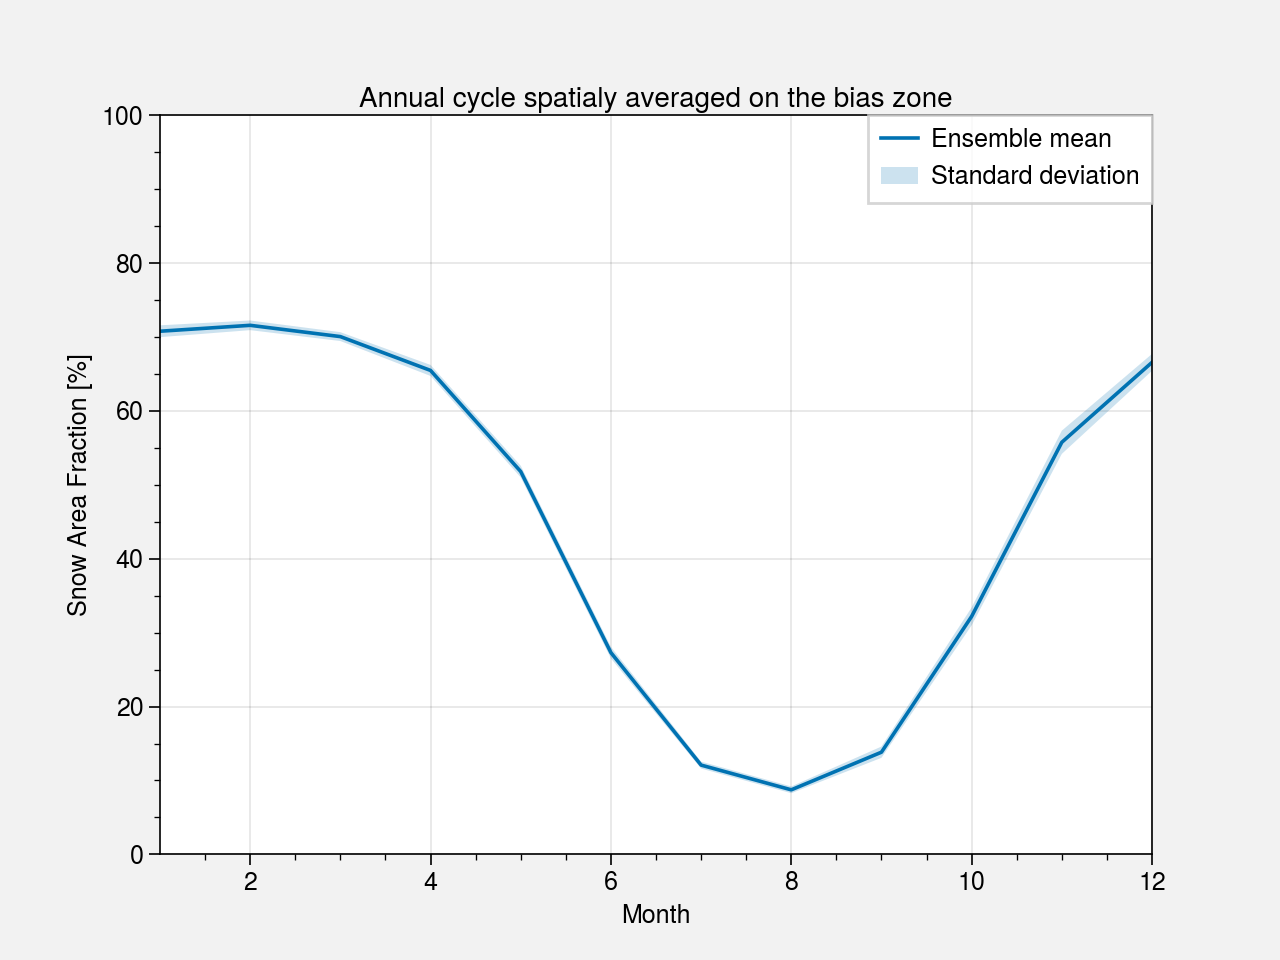

In [30]:
x = ac_historical_ens.month
y = ac_historical_ens.mean('realization')
std = ac_historical_ens.std('realization')

fig, ax = plt.subplots()

y.plot(ax=ax, label='Ensemble mean')
ax.fill_between(x, y-std, y+std, alpha=0.2, label='Standard deviation')

plt.title('Annual cycle spatialy averaged on the bias zone')
plt.ylim(0,100)
plt.ylabel('Snow Area Fraction [%]')
plt.xlabel('Month')
plt.legend()

Text(0.5, 0, 'Month')

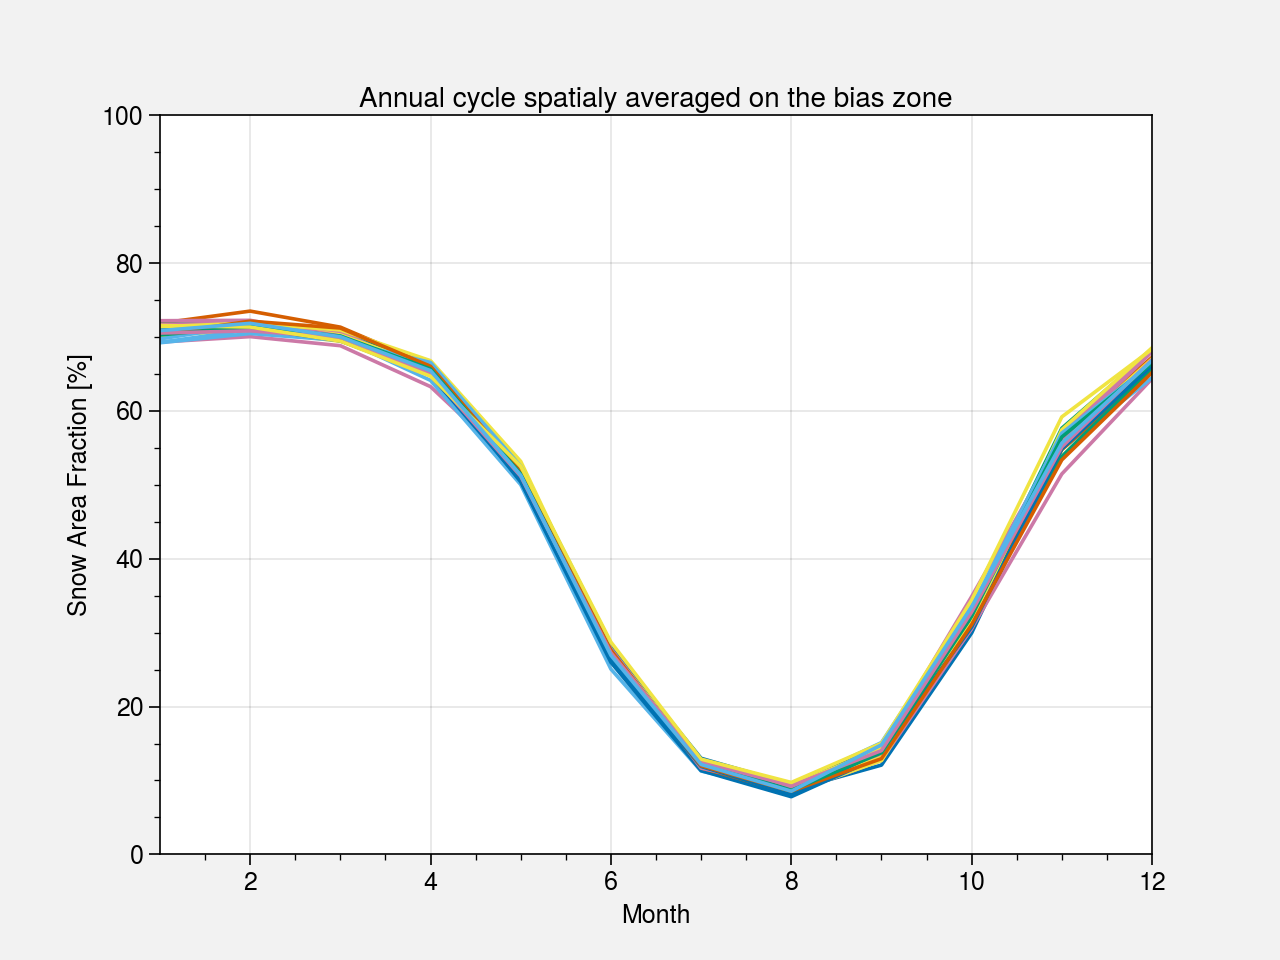

In [31]:
fig, ax = plt.subplots()

for i in ac_historical_ens.realization.values:
    ac_historical_ens[i].plot(ax=ax)

plt.title('Annual cycle spatialy averaged on the bias zone')
plt.ylim(0,100)
plt.ylabel('Snow Area Fraction [%]')
plt.xlabel('Month')